# Locate peak on 2-D area detector image

*APS Training for Bluesky Data Acquisition*.

**Objective**

Measure a simulated diffraction spot with an EPICS area detector
and find its centroid and width.

Note: The position, width, and peak intensity of the simulated is randomized and will be different each time this note book is run.  In fact, the EPICS support applies a small amount of jitter to the position to better simulate a real signal.

## Start the `instrument` package

In [1]:
from instrument.collection import *

I Sun-09:05:15 - ############################################################ startup
I Sun-09:05:15 - logging started
I Sun-09:05:15 - logging level = 10
I Sun-09:05:15 - /home/apsu/bluesky/instrument/collection.py
I Sun-09:05:15 - /home/apsu/bluesky/instrument/mpl/notebook.py


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/apsu/bluesky/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Sun-09:05:16 - /home/apsu/bluesky/instrument/iocs/check_iocs.py
I Sun-09:05:16 - EPICS IOCs ready...


cannot connect to IOC:float1.NAME


I Sun-09:05:17 - EPICS registers IOC not running.  Starting now...
 7433.IOC_registers (04/11/2021 09:05:17 AM) (Detached) 1 Socket in /run/screen/S-apsu.
D Sun-09:05:17 - registers IOC started
I Sun-09:05:17 - No Sockets found in /run/screen/S-apsu.
I Sun-09:05:17 - #### Bluesky Framework ####
I Sun-09:05:17 - /home/apsu/bluesky/instrument/framework/check_python.py
I Sun-09:05:17 - /home/apsu/bluesky/instrument/framework/check_bluesky.py
I Sun-09:05:17 - /home/apsu/bluesky/instrument/framework/initialize.py
I Sun-09:05:18 - using databroker catalog 'training'
I Sun-09:05:18 - /home/apsu/bluesky/instrument/framework/metadata.py
I Sun-09:05:19 - #### Devices ####
I Sun-09:05:19 - /home/apsu/bluesky/instrument/devices/area_detector.py
I Sun-09:05:19 - /home/apsu/bluesky/instrument/devices/calculation_records.py
I Sun-09:05:28 - /home/apsu/bluesky/instrument/devices/ioc_stats.py
I Sun-09:05:28 - /home/apsu/bluesky/instrument/devices/motors.py
I Sun-09:05:30 - /home/apsu/bluesky/instrument

Add the name of this notebook as metadata to every run.  This is done by adding to the RunEngine's metadata dictionary (`RE.md`), content that will be added to the *start* document of every run.  The metadata is useful documentation about a run and can be used for several purposes, such as to record a general condition (such as the name of this notebook) or to identify these runs from a database search.

In [2]:
RE.md["notebook"] = "locate_image_peak"

Count the detector : record an image.

In [3]:
RE(bp.count([adsimdet], md={"motive": "locate_image_peak"}))



Transient Scan ID: 19     Time: 2021-04-11 09:05:36
Persistent Unique Scan ID: '3c16d9d8-adf8-4863-85ed-9055b405b283'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+
|   seq_num |       time |
+-----------+------------+
|         1 | 09:05:37.4 |
+-----------+------------+
generator count ['3c16d9d8'] (scan num: 19)


('3c16d9d8-adf8-4863-85ed-9055b405b283',)

## View the image

Since area detector images are typically quite large, they are never 
read into Python memory during data acquisition.  To view the image 
here, we need to use the *databroker* which reads the run data.  The 
run data includes the reference to the file that contains the image.

### Get the run
First, get the most recent run from `db`.

In [4]:
run = db.v2[-1]

Look at the run's metadata.  Confirm it has the `{"motive": "locate_image_peak"}` metadata we added.  That was stored in the `start` document.

In [5]:
print(run.metadata["start"]["motive"])

locate_image_peak


### Primary stream
The image was collected in the primary data stream.  Get the primary stream data from the database.

In [6]:
primary_data = run.primary.read()
primary_data

<xarray.Dataset>
Dimensions:         (dim_0: 1, dim_1: 1024, dim_2: 1024, time: 1)
Coordinates:
  * time            (time) float64 1.618e+09
Dimensions without coordinates: dim_0, dim_1, dim_2
Data variables:
    adsimdet_image  (time, dim_0, dim_1, dim_2) uint8 6 8 8 5 4 9 ... 8 4 7 4 5

### Get the image data

Get the named image `adsimdet_image` from the primary stream.

In [7]:
image = primary_data["adsimdet_image"]
image

<xarray.DataArray 'adsimdet_image' (time: 1, dim_0: 1, dim_1: 1024, dim_2: 1024)>
array([[[[ 6,  8,  8, ...,  7, 10,  6],
         [ 4, 10,  8, ...,  9,  9,  4],
         [ 6,  8,  4, ...,  6,  6,  8],
         ...,
         [10,  9,  7, ..., 10,  9,  8],
         [ 5,  8,  7, ...,  7,  6, 10],
         [10, 10,  4, ...,  7,  4,  5]]]], dtype=uint8)
Coordinates:
  * time     (time) float64 1.618e+09
Dimensions without coordinates: dim_0, dim_1, dim_2
Attributes:
    object:   adsimdet

### Image frame
This image object has rank of 4.  We just want the image frame (the last two indices).  Select the first item of each of the first two indices (time, frame number).

In [8]:
frame = image[0][0]
frame

<xarray.DataArray 'adsimdet_image' (dim_1: 1024, dim_2: 1024)>
array([[ 6,  8,  8, ...,  7, 10,  6],
       [ 4, 10,  8, ...,  9,  9,  4],
       [ 6,  8,  4, ...,  6,  6,  8],
       ...,
       [10,  9,  7, ..., 10,  9,  8],
       [ 5,  8,  7, ...,  7,  6, 10],
       [10, 10,  4, ...,  7,  4,  5]], dtype=uint8)
Coordinates:
    time     float64 1.618e+09
Dimensions without coordinates: dim_1, dim_2
Attributes:
    object:   adsimdet

### Show the image

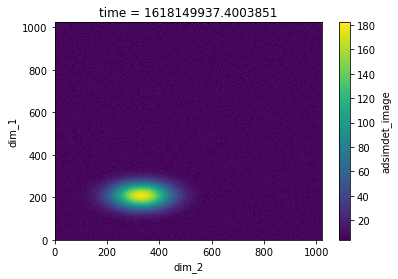

In [9]:
frame.plot.pcolormesh()
# In MS VSCode, this one cell stalls, use JupyterLab from here.  :(

### Center & size of spot
Determine the center and width of this spot in both directions.  We'll use our own function (from `instrument/utils/image_analysis.py`) since no package gives us all of this in one place.  Our function is extracted and modified from the *PeakStats* support in bluesky's *BestEffortCallback* and also uses a function from *scipy*.

Note that the `centroid` measure here is the channel number weighted by the intensity value (as computed by the *scipy* package).  The `fwhm` measure here (from the *BestEffortCallback*) is the computed difference in channel number between the high and low side of the maximum at half the maximum-minimum value.  The `crossings` measure shows the interpolated locations at which the intensity crossed this half value.  The other measures should be self-explanatory.

In [10]:
analyze_image(frame)

================= =========================== ===========================
measure           vertical (dim_1)            horizontal (dim_2)         
================= =========================== ===========================
centroid_position 211.12558355471873          332.90054702048417         
fwhm              100.45554667148124          185.092760707635           
crossings         [160.89781022 261.35335689] [240.35416667 425.44692737]
maximum           (211, 40737)                (332, 25510)               
center_position   414.41936890113766          453.8294929839833          
minimum           (758, 6975)                 (670, 7016)                
================= =========================== ===========================

